# Sentiment Analysis on Amazon Reviews

In [ ]:
!nvidia-smi

Mon Dec 27 08:13:43 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   71C    P8    33W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
#loading the required libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
df = pd.read_csv('amazonreviews.tsv', sep='\t')
df.head()

,label,review
0,pos,Stuning even for the non-gamer: This sound tra...
1,pos,The best soundtrack ever to anything.: I'm rea...
2,pos,Amazing!: This soundtrack is my favorite music...
3,pos,Excellent Soundtrack: I truly like this soundt...
4,pos,"Remember, Pull Your Jaw Off The Floor After He..."


In [5]:
df['label'].value_counts()

neg    5097
pos    4903
Name: label, dtype: int64

In [6]:
# REMOVE NaN VALUES AND EMPTY STRINGS:
df.dropna(inplace=True)

blanks = []  # start with an empty list

for i,lb,rv in df.itertuples():  # iterate over the DataFrame
    if type(rv)==str:            # avoid NaN values
        if rv.isspace():         # test 'review' for whitespace
            blanks.append(i)     # add matching index numbers to the list

df.drop(blanks, inplace=True)

In [7]:
df['label'].value_counts()

neg    5097
pos    4903
Name: label, dtype: int64

In [8]:
X_data = df['review']

In [9]:
X_data

0       Stuning even for the non-gamer: This sound tra...
1       The best soundtrack ever to anything.: I'm rea...
2       Amazing!: This soundtrack is my favorite music...
3       Excellent Soundtrack: I truly like this soundt...
4       Remember, Pull Your Jaw Off The Floor After He...
                              ...                        
9995    A revelation of life in small town America in ...
9996    Great biography of a very interesting journali...
9997    Interesting Subject; Poor Presentation: You'd ...
9998    Don't buy: The box looked used and it is obvio...
9999    Beautiful Pen and Fast Delivery.: The pen was ...
Name: review, Length: 10000, dtype: object

In [10]:
y_data = df['label']

In [11]:
y_data

0       pos
1       pos
2       pos
3       pos
4       pos
       ... 
9995    pos
9996    pos
9997    neg
9998    neg
9999    pos
Name: label, Length: 10000, dtype: object

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y_data)

In [13]:
y

array([1, 1, 1, ..., 0, 0, 1])

## CountVectorizer Bag of Words

In [ ]:
#Calculate max length of review
L = []
for i in range(0,10000):
    a = len(df['review'][i])
    L.append(a)
    a = 0
print(max(L))

1015


In [ ]:
#Tokenization
from sklearn.feature_extraction.text import CountVectorizer


In [ ]:
cv = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
X = cv.fit_transform(df['review']).toarray()


In [ ]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
y

array([1, 1, 1, ..., 0, 0, 1])

### Naive Bayes

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [0 0]
 ...
 [0 1]
 [0 0]
 [1 1]]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[656 341]
 [303 700]]


0.678

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.66      0.67       997
           1       0.67      0.70      0.68      1003

    accuracy                           0.68      2000
   macro avg       0.68      0.68      0.68      2000
weighted avg       0.68      0.68      0.68      2000



In [ ]:

from sklearn.model_selection import cross_val_score
accuracies1 = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies1.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies1.std()*100))

Accuracy: 68.75 %
Standard Deviation: 1.73 %


### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [0 0]
 ...
 [1 1]
 [0 0]
 [1 1]]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[847 150]
 [159 844]]


0.8455

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85       997
           1       0.85      0.84      0.85      1003

    accuracy                           0.85      2000
   macro avg       0.85      0.85      0.85      2000
weighted avg       0.85      0.85      0.85      2000



### K-Nearest Neighbors (K-NN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 0]
 [0 1]
 [0 0]
 ...
 [1 1]
 [1 0]
 [1 1]]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[609 388]
 [231 772]]


0.6905

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.61      0.66       997
           1       0.67      0.77      0.71      1003

    accuracy                           0.69      2000
   macro avg       0.70      0.69      0.69      2000
weighted avg       0.70      0.69      0.69      2000



#Linear SVM

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [0 0]
 ...
 [1 1]
 [0 0]
 [1 1]]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[830 167]
 [181 822]]


0.826

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.83      0.83       997
           1       0.83      0.82      0.83      1003

    accuracy                           0.83      2000
   macro avg       0.83      0.83      0.83      2000
weighted avg       0.83      0.83      0.83      2000



### Kernel SVM


In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [0 0]
 ...
 [1 1]
 [0 0]
 [1 1]]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[859 138]
 [153 850]]


0.8545

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86       997
           1       0.86      0.85      0.85      1003

    accuracy                           0.85      2000
   macro avg       0.85      0.85      0.85      2000
weighted avg       0.85      0.85      0.85      2000



### Decision Tree Classification


In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [0 0]
 ...
 [1 1]
 [0 0]
 [1 1]]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[735 262]
 [296 707]]


0.721

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.74      0.72       997
           1       0.73      0.70      0.72      1003

    accuracy                           0.72      2000
   macro avg       0.72      0.72      0.72      2000
weighted avg       0.72      0.72      0.72      2000



### Random Forest Classification

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [0 0]
 ...
 [1 1]
 [0 0]
 [1 1]]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[854 143]
 [158 845]]


0.8495

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       997
           1       0.86      0.84      0.85      1003

    accuracy                           0.85      2000
   macro avg       0.85      0.85      0.85      2000
weighted avg       0.85      0.85      0.85      2000



### ADABOOST CLASSIFIER

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
classifier = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
classifier.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=1)

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 0]
 [1 1]
 [0 0]
 ...
 [1 1]
 [0 0]
 [1 1]]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[687 310]
 [162 841]]


0.764

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.69      0.74       997
           1       0.73      0.84      0.78      1003

    accuracy                           0.76      2000
   macro avg       0.77      0.76      0.76      2000
weighted avg       0.77      0.76      0.76      2000



### XGBOOST CLASSIFIER

In [ ]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier()

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [0 0]
 ...
 [1 1]
 [0 0]
 [1 1]]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[832 165]
 [271 732]]


0.782

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.83      0.79       997
           1       0.82      0.73      0.77      1003

    accuracy                           0.78      2000
   macro avg       0.79      0.78      0.78      2000
weighted avg       0.79      0.78      0.78      2000



### CATBOOST Classifier

In [ ]:
!pip3 install catboost

     |████████████████████████████████| 76.3 MB 70 kB/s 


In [ ]:
import catboost as cb

In [ ]:
from catboost import CatBoostClassifier
classifier = CatBoostClassifier()
classifier.fit(X_train, y_train)

Learning rate set to 0.025035
0:	learn: 0.6875651	total: 116ms	remaining: 1m 56s
1:	learn: 0.6819077	total: 189ms	remaining: 1m 34s
2:	learn: 0.6769804	total: 253ms	remaining: 1m 24s
3:	learn: 0.6720695	total: 316ms	remaining: 1m 18s
4:	learn: 0.6665330	total: 382ms	remaining: 1m 16s
5:	learn: 0.6630491	total: 446ms	remaining: 1m 13s
6:	learn: 0.6591821	total: 512ms	remaining: 1m 12s
7:	learn: 0.6552161	total: 575ms	remaining: 1m 11s
8:	learn: 0.6524364	total: 642ms	remaining: 1m 10s
9:	learn: 0.6491591	total: 710ms	remaining: 1m 10s
10:	learn: 0.6457535	total: 781ms	remaining: 1m 10s
11:	learn: 0.6425807	total: 852ms	remaining: 1m 10s
12:	learn: 0.6395184	total: 917ms	remaining: 1m 9s
13:	learn: 0.6359053	total: 982ms	remaining: 1m 9s
14:	learn: 0.6320981	total: 1.05s	remaining: 1m 8s
15:	learn: 0.6297896	total: 1.1s	remaining: 1m 7s
16:	learn: 0.6266119	total: 1.17s	remaining: 1m 7s
17:	learn: 0.6242228	total: 1.24s	remaining: 1m 7s
18:	learn: 0.6217953	total: 1.31s	remaining: 1m 7s


In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [0 0]
 ...
 [1 1]
 [0 0]
 [1 1]]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[840 157]
 [166 837]]


0.8385

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84       997
           1       0.84      0.83      0.84      1003

    accuracy                           0.84      2000
   macro avg       0.84      0.84      0.84      2000
weighted avg       0.84      0.84      0.84      2000



### Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier()
classifier.fit(X_train, y_train)

GradientBoostingClassifier()

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [0 0]
 ...
 [1 1]
 [0 0]
 [1 1]]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[845 152]
 [262 741]]


0.793

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.85      0.80       997
           1       0.83      0.74      0.78      1003

    accuracy                           0.79      2000
   macro avg       0.80      0.79      0.79      2000
weighted avg       0.80      0.79      0.79      2000



### LightGBM (Light Gradient Boosting Machine)


In [ ]:
import lightgbm as lgb
from lightgbm import LGBMClassifier
classifier = LGBMClassifier()
classifier.fit(X_train, y_train)

LGBMClassifier()

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [0 0]
 ...
 [1 1]
 [0 0]
 [1 1]]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[843 154]
 [153 850]]


0.8465

###Kernel SVM performs the best with accuracy of 85.45%

## TfIdf Vectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')

In [ ]:
X = tfidf.fit_transform(df['review']).toarray()


### Naive Bayes

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)



GaussianNB()

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))



[[0 0]
 [1 1]
 [0 0]
 ...
 [0 1]
 [0 0]
 [1 1]]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred))


[[660 337]
 [346 657]]
              precision    recall  f1-score   support

           0       0.66      0.66      0.66       997
           1       0.66      0.66      0.66      1003

    accuracy                           0.66      2000
   macro avg       0.66      0.66      0.66      2000
weighted avg       0.66      0.66      0.66      2000



### Logistic Regression


In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)


LogisticRegression(random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))


[[0 0]
 [1 1]
 [0 0]
 ...
 [1 1]
 [0 0]
 [1 1]]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred))


[[865 132]
 [141 862]]
              precision    recall  f1-score   support

           0       0.86      0.87      0.86       997
           1       0.87      0.86      0.86      1003

    accuracy                           0.86      2000
   macro avg       0.86      0.86      0.86      2000
weighted avg       0.86      0.86      0.86      2000



### K-Nearest Neighbors (K-NN)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)


KNeighborsClassifier()

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))


[[1 0]
 [1 1]
 [0 0]
 ...
 [1 1]
 [1 0]
 [1 1]]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred))


[[681 316]
 [235 768]]
              precision    recall  f1-score   support

           0       0.74      0.68      0.71       997
           1       0.71      0.77      0.74      1003

    accuracy                           0.72      2000
   macro avg       0.73      0.72      0.72      2000
weighted avg       0.73      0.72      0.72      2000



### Linear SVM


In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)



SVC(kernel='linear', random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))


[[0 0]
 [1 1]
 [0 0]
 ...
 [1 1]
 [0 0]
 [1 1]]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)


[[863 134]
 [133 870]]


0.8665

In [ ]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.87      0.87      0.87       997
           1       0.87      0.87      0.87      1003

    accuracy                           0.87      2000
   macro avg       0.87      0.87      0.87      2000
weighted avg       0.87      0.87      0.87      2000



### Kernel SVM


In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)


SVC(random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))


[[0 0]
 [1 1]
 [0 0]
 ...
 [1 1]
 [0 0]
 [1 1]]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred))


[[871 126]
 [127 876]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       997
           1       0.87      0.87      0.87      1003

    accuracy                           0.87      2000
   macro avg       0.87      0.87      0.87      2000
weighted avg       0.87      0.87      0.87      2000



### Decision Tree Classification


In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))


[[0 0]
 [1 1]
 [0 0]
 ...
 [1 1]
 [0 0]
 [1 1]]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred))


[[721 276]
 [287 716]]
              precision    recall  f1-score   support

           0       0.72      0.72      0.72       997
           1       0.72      0.71      0.72      1003

    accuracy                           0.72      2000
   macro avg       0.72      0.72      0.72      2000
weighted avg       0.72      0.72      0.72      2000



### Random Forest Classification


In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)


RandomForestClassifier(criterion='entropy', random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))


[[0 0]
 [1 1]
 [0 0]
 ...
 [1 1]
 [0 0]
 [1 1]]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred))


[[843 154]
 [162 841]]
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       997
           1       0.85      0.84      0.84      1003

    accuracy                           0.84      2000
   macro avg       0.84      0.84      0.84      2000
weighted avg       0.84      0.84      0.84      2000



### ADABOOST CLASSIFIER


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
classifier = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
classifier.fit(X_train, y_train)



AdaBoostClassifier(learning_rate=1)

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))


[[0 0]
 [1 1]
 [0 0]
 ...
 [1 1]
 [0 0]
 [1 1]]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred))


[[856 141]
 [312 691]]
              precision    recall  f1-score   support

           0       0.73      0.86      0.79       997
           1       0.83      0.69      0.75      1003

    accuracy                           0.77      2000
   macro avg       0.78      0.77      0.77      2000
weighted avg       0.78      0.77      0.77      2000



### XGBOOST CLASSIFIER


In [ ]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)


XGBClassifier()

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))


[[0 0]
 [1 1]
 [0 0]
 ...
 [1 1]
 [0 0]
 [1 1]]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred))


[[837 160]
 [280 723]]
              precision    recall  f1-score   support

           0       0.75      0.84      0.79       997
           1       0.82      0.72      0.77      1003

    accuracy                           0.78      2000
   macro avg       0.78      0.78      0.78      2000
weighted avg       0.78      0.78      0.78      2000



### CATBOOST Classifier


In [ ]:
import catboost as cb

from catboost import CatBoostClassifier
classifier = CatBoostClassifier()
classifier.fit(X_train, y_train)



Learning rate set to 0.025035
0:	learn: 0.6870383	total: 352ms	remaining: 5m 52s
1:	learn: 0.6821320	total: 636ms	remaining: 5m 17s
2:	learn: 0.6764197	total: 916ms	remaining: 5m 4s
3:	learn: 0.6707354	total: 1.19s	remaining: 4m 55s
4:	learn: 0.6662434	total: 1.45s	remaining: 4m 48s
5:	learn: 0.6625005	total: 1.72s	remaining: 4m 45s
6:	learn: 0.6581280	total: 1.99s	remaining: 4m 41s
7:	learn: 0.6539805	total: 2.25s	remaining: 4m 39s
8:	learn: 0.6510035	total: 2.52s	remaining: 4m 37s
9:	learn: 0.6474124	total: 2.79s	remaining: 4m 36s
10:	learn: 0.6437120	total: 3.06s	remaining: 4m 35s
11:	learn: 0.6393795	total: 3.33s	remaining: 4m 33s
12:	learn: 0.6358827	total: 3.6s	remaining: 4m 33s
13:	learn: 0.6336783	total: 3.88s	remaining: 4m 33s
14:	learn: 0.6308237	total: 4.14s	remaining: 4m 32s
15:	learn: 0.6279966	total: 4.4s	remaining: 4m 30s
16:	learn: 0.6252723	total: 4.67s	remaining: 4m 29s
17:	learn: 0.6217595	total: 4.94s	remaining: 4m 29s
18:	learn: 0.6188102	total: 5.22s	remaining: 4m

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))



[[0 0]
 [1 1]
 [0 0]
 ...
 [1 1]
 [0 0]
 [1 1]]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred))


[[845 152]
 [171 832]]
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       997
           1       0.85      0.83      0.84      1003

    accuracy                           0.84      2000
   macro avg       0.84      0.84      0.84      2000
weighted avg       0.84      0.84      0.84      2000



### Gradient Boosting Classifier


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier()
classifier.fit(X_train, y_train)



GradientBoostingClassifier()

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))



[[0 0]
 [1 1]
 [0 0]
 ...
 [1 1]
 [0 0]
 [1 1]]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred))


[[843 154]
 [271 732]]
              precision    recall  f1-score   support

           0       0.76      0.85      0.80       997
           1       0.83      0.73      0.78      1003

    accuracy                           0.79      2000
   macro avg       0.79      0.79      0.79      2000
weighted avg       0.79      0.79      0.79      2000



### LightGBM (Light Gradient Boosting Machine)


In [ ]:
import lightgbm as lgb
from lightgbm import LGBMClassifier
classifier = LGBMClassifier()
classifier.fit(X_train, y_train)


LGBMClassifier()

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))


[[0 0]
 [1 1]
 [0 0]
 ...
 [1 1]
 [0 0]
 [1 1]]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)


[[840 157]
 [160 843]]


0.8415

In [ ]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.84      0.84      0.84       997
           1       0.84      0.84      0.84      1003

    accuracy                           0.84      2000
   macro avg       0.84      0.84      0.84      2000
weighted avg       0.84      0.84      0.84      2000



###Linear and Kernel SVM performs the best with 87% accuracy.

## Word2Vec

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.preprocessing.sequence import pad_sequences
from keras.utils import np_utils
import gensim
import nltk
from gensim.models.word2vec import Word2Vec
import tensorflow as tf
from tqdm import tqdm
nltk.download('stopwords')
import re
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
X_data

0       Stuning even for the non-gamer: This sound tra...
1       The best soundtrack ever to anything.: I'm rea...
2       Amazing!: This soundtrack is my favorite music...
3       Excellent Soundtrack: I truly like this soundt...
4       Remember, Pull Your Jaw Off The Floor After He...
                              ...                        
9995    A revelation of life in small town America in ...
9996    Great biography of a very interesting journali...
9997    Interesting Subject; Poor Presentation: You'd ...
9998    Don't buy: The box looked used and it is obvio...
9999    Beautiful Pen and Fast Delivery.: The pen was ...
Name: review, Length: 10000, dtype: object

In [ ]:
from keras.preprocessing.text import Tokenizer

samples = X_data
tokenizer = Tokenizer(lower=True, split=' ') # creates tokenizer
tokenizer.fit_on_texts(samples)  # builds the word index
sequences = tokenizer.texts_to_sequences(samples) #turns strings into list of integers
# word_index is a dictionary mapping words to an integer index
word_index = tokenizer.word_index 
print(f'Found {len(word_index)} unique tokens. ')

Found 33469 unique tokens. 


In [ ]:
max([max(sequence) for sequence in sequences])

33469

In [ ]:
# Each number is the index of the word in the order of word in original text
sequences[0]

[17071,
 72,
 11,
 1,
 612,
 8603,
 8,
 209,
 474,
 13,
 344,
 7,
 6190,
 1,
 17072,
 10,
 59,
 377,
 26,
 67,
 3,
 41,
 1776,
 7,
 72,
 5,
 119,
 64,
 724,
 12448,
 141,
 123,
 3,
 21,
 509,
 1,
 141,
 7563,
 1744,
 17,
 44,
 6,
 27,
 6,
 1,
 618,
 3,
 21,
 107,
 509,
 7,
 46,
 1,
 90,
 123,
 7,
 10094,
 253,
 39,
 2813,
 17073,
 2,
 400,
 4,
 12449,
 1112,
 18,
 17074,
 3369,
 2,
 6191,
 17075,
 7,
 41,
 3370,
 182,
 64,
 2403,
 5,
 367]

In [ ]:


# We reverse it, mapping integer indices to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# We decode the review; note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in sequences[0]])

def sequence_to_text(sequence):
    words =  [reverse_word_index.get(letter) for letter in sequence]
    return words

my_text = list(map(sequence_to_text, sequences))



In [ ]:
print(sequences[0])


[17071, 72, 11, 1, 612, 8603, 8, 209, 474, 13, 344, 7, 6190, 1, 17072, 10, 59, 377, 26, 67, 3, 41, 1776, 7, 72, 5, 119, 64, 724, 12448, 141, 123, 3, 21, 509, 1, 141, 7563, 1744, 17, 44, 6, 27, 6, 1, 618, 3, 21, 107, 509, 7, 46, 1, 90, 123, 7, 10094, 253, 39, 2813, 17073, 2, 400, 4, 12449, 1112, 18, 17074, 3369, 2, 6191, 17075, 7, 41, 3370, 182, 64, 2403, 5, 367]


In [ ]:
word2vec = gensim.models.Word2Vec(my_text,
                                  size=100,
                                  window=10,
                                  min_count=1)
word2vec.train(my_text, total_examples=25026, epochs=10)

(6045948, 8056400)

In [ ]:
from keras.preprocessing.sequence import pad_sequences
max_length = 500 # fix the length of each review 
max_words = len(word_index.keys()) # fix number of words 

training_samples = 8000
validation_samples = 2000
data = pad_sequences(sequences, maxlen=max_length)

#labels = np.asarray(y)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', y.shape)

# Split the data into a training set and a validation set
# But first, shuffle the data, since we started from data
# where sample are ordered (all negative first, then all positive).
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = y[indices]

x_train = data[:training_samples]
y_train = y[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = y[training_samples: training_samples + validation_samples]
print('Shape of training data: ', x_train.shape)
print('Shape of validation data: ', x_val.shape)



Shape of data tensor: (10000, 500)
Shape of label tensor: (10000,)
Shape of training data:  (8000, 500)
Shape of validation data:  (2000, 500)


In [ ]:
embedding_dim = 100

embedding_matrix = np.zeros((max_words+1, embedding_dim))
for word , i in word_index.items():
    embedding_vector = word2vec.wv[word]
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector


embedding_matrix.shape


(33470, 100)

In [ ]:
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.27375305,  1.14187646,  0.30089387, ..., -1.36907172,
        -0.42710656,  1.17651033],
       [-0.93015718,  2.54539204,  1.05703723, ..., -1.56495953,
        -0.56532514,  0.06822798],
       ...,
       [-0.04921268, -0.02345217,  0.03574969, ..., -0.00460344,
         0.01935622,  0.02592246],
       [-0.04401297, -0.01332525,  0.04610242, ..., -0.01767614,
         0.04902555,  0.0178989 ],
       [ 0.021632  , -0.036396  ,  0.03671756, ..., -0.00793202,
        -0.05167044, -0.00661989]])

In [ ]:

from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense


model = Sequential()
model.add(Embedding(max_words+1, embedding_dim, input_length=max_length))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=100,
                    batch_size=32,
                    validation_data=(x_val, y_val))



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 500, 100)          3347000   
                                                                 
 flatten_2 (Flatten)         (None, 50000)             0         
                                                                 
 dense_4 (Dense)             (None, 32)                1600032   
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4,947,065
Trainable params: 4,947,065
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
250/250 [==============================] - 2s 7ms/step - loss: 0.7086 - acc: 0.5080 - val_loss: 0.7006 - val_acc: 0.4965
Epoch 2/100
250/250 [======================

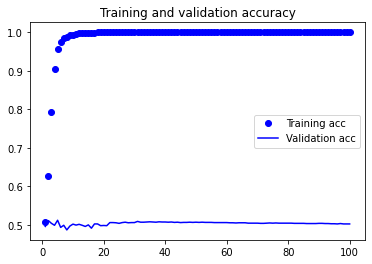

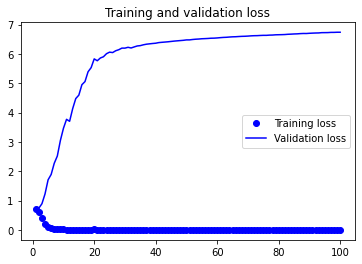

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()



## Use VADER to analyze Amazon Reviews

In [ ]:
import nltk
nltk.download('vader_lexicon')


from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
a = 'This was a good movie.'
sid.polarity_scores(a)



{'compound': 0.4404, 'neg': 0.0, 'neu': 0.508, 'pos': 0.492}

In [ ]:
a = 'This was the best, most awesome movie EVER MADE!!!'
sid.polarity_scores(a)




{'compound': 0.8877, 'neg': 0.0, 'neu': 0.425, 'pos': 0.575}

In [ ]:
a = 'This was the worst film to ever disgrace the screen.'
sid.polarity_scores(a)


{'compound': -0.8074, 'neg': 0.477, 'neu': 0.523, 'pos': 0.0}

In [ ]:
## Let's run the first review through VADER

sid.polarity_scores(df.loc[0]['review'])

df.loc[0]['label']


'pos'

In [ ]:
df['scores'] = df['review'].apply(lambda review: sid.polarity_scores(review))

df.head()

df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])

df.head()

df['comp_score'] = df['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

df.head()



,label,review,scores,compound,comp_score
0,pos,Stuning even for the non-gamer: This sound tra...,"{'neg': 0.088, 'neu': 0.669, 'pos': 0.243, 'co...",0.9454,pos
1,pos,The best soundtrack ever to anything.: I'm rea...,"{'neg': 0.018, 'neu': 0.837, 'pos': 0.145, 'co...",0.8957,pos
2,pos,Amazing!: This soundtrack is my favorite music...,"{'neg': 0.04, 'neu': 0.692, 'pos': 0.268, 'com...",0.9858,pos
3,pos,Excellent Soundtrack: I truly like this soundt...,"{'neg': 0.09, 'neu': 0.615, 'pos': 0.295, 'com...",0.9814,pos
4,pos,"Remember, Pull Your Jaw Off The Floor After He...","{'neg': 0.0, 'neu': 0.746, 'pos': 0.254, 'comp...",0.9781,pos


In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

accuracy_score(df['label'],df['comp_score'])




0.7091

In [ ]:
print(classification_report(df['label'],df['comp_score']))

print(confusion_matrix(df['label'],df['comp_score']))


              precision    recall  f1-score   support

         neg       0.86      0.51      0.64      5097
         pos       0.64      0.91      0.75      4903

    accuracy                           0.71     10000
   macro avg       0.75      0.71      0.70     10000
weighted avg       0.75      0.71      0.70     10000

[[2623 2474]
 [ 435 4468]]


## BERT

In [1]:
# NLP with Bert for Sentiment Analysis

### Importing the libraries

!pip3 install ktrain


     |████████████████████████████████| 25.3 MB 12.4 MB/s 
     |████████████████████████████████| 6.8 MB 43.1 MB/s 
     |████████████████████████████████| 981 kB 22.9 MB/s 
     |████████████████████████████████| 263 kB 35.8 MB/s 
     |████████████████████████████████| 2.8 MB 27.6 MB/s 
     |████████████████████████████████| 1.2 MB 28.0 MB/s 
     |████████████████████████████████| 468 kB 33.9 MB/s 
     |████████████████████████████████| 596 kB 41.6 MB/s 
     |████████████████████████████████| 3.3 MB 43.4 MB/s 
     |████████████████████████████████| 895 kB 44.0 MB/s 
     |████████████████████████████████| 61 kB 458 kB/s 
  Created wheel for ktrain: filename=ktrain-0.28.3-py3-none-any.whl size=25292659 sha256=e12b11383206bedf0023163d1e021c41046052881026c75de8172630349901ca
  Stored in directory: /root/.cache/pip/wheels/6a/7e/c3/f46cdfc2b81c54424923b1405d7e670c35cacc11ada9a47b1c
  Created wheel for seqeval: filename=seqeval-0.0.19-py3-none-any.whl size=9929 sha256=545591238ae2767

In [2]:

import numpy as np
import tensorflow as tf
import ktrain
from ktrain import text

In [14]:
df

,label,review
0,pos,Stuning even for the non-gamer: This sound tra...
1,pos,The best soundtrack ever to anything.: I'm rea...
2,pos,Amazing!: This soundtrack is my favorite music...
3,pos,Excellent Soundtrack: I truly like this soundt...
4,pos,"Remember, Pull Your Jaw Off The Floor After He..."
...,...,...
9995,pos,A revelation of life in small town America in ...
9996,pos,Great biography of a very interesting journali...
9997,neg,Interesting Subject; Poor Presentation: You'd ...
9998,neg,Don't buy: The box looked used and it is obvio...


In [15]:
### Creating the training and test sets

(x_train, y_train), (x_test, y_test), preproc = text.texts_from_df(df,
                   text_column = 'review',
                   label_columns = ['label'],
                   val_df=None,
                   maxlen=500, 
                   val_pct=0.1,
                   ngram_range=1, 
                   preprocess_mode='bert',        
                   verbose=1)

['neg', 'pos']
      neg  pos
2427  0.0  1.0
6348  0.0  1.0
8923  0.0  1.0
7447  0.0  1.0
1196  1.0  0.0
['neg', 'pos']
      neg  pos
93    1.0  0.0
3963  0.0  1.0
2646  1.0  0.0
4401  1.0  0.0
7205  0.0  1.0
downloading pretrained BERT model (uncased_L-12_H-768_A-12.zip)...
[██████████████████████████████████████████████████]
extracting pretrained BERT model...
done.

cleanup downloaded zip...
done.

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


In [16]:
## Part 2: Building the BERT model

model = text.text_classifier(name='bert',
                             train_data=(x_train, y_train),
                             preproc=preproc)


Is Multi-Label? False
maxlen is 500
done.


In [17]:
## Part 3: Training the BERT model

learner = ktrain.get_learner(model=model,
                             train_data=(x_train, y_train),
                             val_data=(x_test, y_test),
                             batch_size=6)


In [18]:
learner.fit_onecycle(lr=2e-5,
                     epochs=2)



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/2
1500/1500 [==============================] - 2411s 2s/step - loss: 0.2533 - accuracy: 0.8952 - val_loss: 0.1941 - val_accuracy: 0.9250
Epoch 2/2
1500/1500 [==============================] - 2389s 2s/step - loss: 0.1094 - accuracy: 0.9640 - val_loss: 0.1708 - val_accuracy: 0.9410
